# **Normal ML model on verious CV method, verious Feature selection method**

**Step--> 1 : Load the dataset**

In [78]:
import pandas as pd
import numpy as np

import warnings
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import (
    train_test_split,
    KFold,
    StratifiedKFold,
    TimeSeriesSplit,
    ShuffleSplit,
    GridSearchCV,
    cross_val_score,
    cross_val_predict,
)
from sklearn.metrics import accuracy_score, precision_score, make_scorer
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC, LinearSVC 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, RFE
from sklearn.utils import shuffle

warnings.filterwarnings('ignore')


# Load dataset
# url = 'https://raw.githubusercontent.com/Me-Rajdip/Data-Set/refs/heads/main/VFL%20Dataset/heart.csv'
url = 'https://raw.githubusercontent.com/Me-Rajdip/Data-Set/refs/heads/main/VFL%20Dataset/Cardiovascular_Disease_Dataset.csv'
data = pd.read_csv(url)

# Exploratory Data Analysis (EDA)
print(data)
print(data.info())
print(data.describe())


     patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0       103368   53       1          2        171                0   
1       119250   40       1          0         94              229   
2       119372   49       1          2        133              142   
3       132514   43       1          0        138              295   
4       146211   31       1          1        199                0   
..         ...  ...     ...        ...        ...              ...   
995    9949544   48       1          2        139              349   
996    9953423   47       1          3        143              258   
997    9965859   69       1          0        156              434   
998    9988507   45       1          1        186              417   
999    9990855   25       1          0        158              270   

     fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                    0                1           147              0      5.3 

**Step-2:Preprocess The data**

In [79]:
df1 = data.fillna(data.median())
df2 = df1.drop(columns=["patientid"], errors='ignore')

# target_column = 'HeartDisease'  
target_column = 'target'
X = df2.drop(columns=[target_column])  
y = data[target_column] 

# # Separate numeric and categorical columns for 
# numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
# # Apply one-hot encoding for categorical columns in Client 2
# encoder = OneHotEncoder(drop='first', sparse_output=False)
# encoded = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))
# encoded.columns = encoder.get_feature_names_out(categorical_cols)
# # Drop original categorical columns and concatenate the encoded ones
# X = pd.concat([df[numeric_cols], encoded], axis=1)
print(X.head())

print(y.head)

   age  gender  chestpain  restingBP  serumcholestrol  fastingbloodsugar  \
0   53       1          2        171                0                  0   
1   40       1          0         94              229                  0   
2   49       1          2        133              142                  0   
3   43       1          0        138              295                  1   
4   31       1          1        199                0                  0   

   restingrelectro  maxheartrate  exerciseangia  oldpeak  slope  \
0                1           147              0      5.3      3   
1                1           115              0      3.7      1   
2                0           202              1      5.0      1   
3                1           153              0      3.2      2   
4                2           136              0      5.3      3   

   noofmajorvessels  
0                 3  
1                 1  
2                 0  
3                 2  
4                 2  
<bound m

**Step-3:Standardize the data**

In [80]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

**Feature selection**

In [81]:
#from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.decomposition import PCA

# Feature selection methods
feature_selection_methods = {
   "Variance Threshold": VarianceThreshold(threshold=(.8 * (1 - .8))),
    "SelectKBest": SelectKBest(chi2, k=10),
    "LDA": LinearDiscriminantAnalysis(n_components=2)
}

**Step-4:Function to evaluate models with different cross-validation methods**

In [82]:
# Function to evaluate model with cross-validation
def evaluate_model_with_cv(model, X_train, y_train, cv_method):
    from sklearn.metrics import make_scorer #Import the make_scorer function here to avoid any potential conflicts
    accuracy = cross_val_score(model, X_train, y_train, cv=cv_method, scoring=make_scorer(accuracy_score)).mean()
    precision = cross_val_score(model, X_train, y_train, cv=cv_method, scoring=make_scorer(precision_score)).mean()
    return accuracy, precision

**Step-5:Function to train and evaluate models using different cross-validation methods and split ratios**

In [83]:
from sklearn.model_selection import (
    KFold,
    StratifiedKFold,
    #LeaveOneOut,
    #LeavePOut,
    #GroupKFold,
    TimeSeriesSplit,
    ShuffleSplit
    #RepeatedKFold,
    #RepeatedStratifiedKFold
)

# Split ratios
split_ratios = [(0.9, 0.1), (0.8, 0.2), (0.75, 0.25)]

# Cross-validation methods
cv_methods = {
    "K-Fold": KFold(n_splits=5),
    "Time Series Split": TimeSeriesSplit(n_splits=5),
    "Shuffle Split": ShuffleSplit(n_splits=5, test_size=0.2),
    "Stratified K-Fold": StratifiedKFold(n_splits=5),
    #"Leave-One-Out": LeaveOneOut(),
    #"Leave-P-Out": LeavePOut(p=2),
    #"Group K-Fold": GroupKFold(n_splits=5),
    #"Repeated K-Fold": RepeatedKFold(n_splits=5, n_repeats=10),
    #"Repeated Stratified K-Fold": RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
}


algorithms = {
    "Logistic Regression": LogisticRegression(),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    'SVC': SVC(kernel='linear', C=0.1),
}


**Hyperparameter tuning for each model**

In [84]:

def tune_hyperparameters(model_name, model, X_train, y_train):
    if model_name == "Logistic Regression":
       param_grid = {'C': [0.1, 1, 10, 100]}
    elif model_name == "Ridge Regression":
        param_grid = {'alpha': [0.1, 1, 10, 100]}  # Ridge regularization parameter
    elif model_name == "Linear SVM":
        param_grid = {'C': [0.1, 1, 10], 'loss': ['hinge', 'squared_hinge']}  # Linear SVM parameters
    else:
        param_grid = {}

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_


**Step-6:Function to evaluate models**



In [85]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  # Train the model on the training data
    y_pred = model.predict(X_test)  # Make predictions on the test data

    # Convert continuous predictions to binary labels (e.g., Logistic Regression/Linear Regression)
    if len(set(y_test)) == 2:  # Binary classification
        if y_pred.ndim == 1:  # Handle Linear Regression output
            y_pred = (y_pred >= 0.5).astype(int)
        elif y_pred.ndim > 1:  # Handle Logistic Regression probabilities
            y_pred = (y_pred[:, 1] >= 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # Weighted for multi-class classification
    recall = recall_score(y_test, y_pred, average='weighted')  # Weighted for multi-class classification
    f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted for multi-class classification

    print(f"Accuracy: {accuracy:.6f}, Precision: {precision:.6f}, Recall: {recall:.6f}, F1 Score: {f1:.6f}")

    return accuracy, precision, recall, f1



**Step-7:Function to run cross-validation for each split ratio**

In [94]:
def run_cross_validation(X, y, split_ratio, cv_methods, algorithms, feature_selection_methods):
    train_ratio, test_ratio = split_ratio
    # Initialize results dictionary with nested structure
    results = {
        algo: {
            cv_name: {fs_name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []} 
                      for fs_name in feature_selection_methods.keys()}
            for cv_name in cv_methods.keys()
        } for algo in algorithms.keys()
    }

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_ratio, test_size=test_ratio, random_state=42)

    for feature_selection_name, feature_selector in feature_selection_methods.items():
        print(f"\nFeature Selection Method: {feature_selection_name}")

        try:
            # Apply feature selection
            X_train_fs = feature_selector.fit_transform(X_train, y_train)
            X_test_fs = feature_selector.transform(X_test)
        except ValueError as e:
            print(f"Error during feature selection: {e}")
            continue

        for cv_name, cv_method in cv_methods.items():
            print(f"Cross-Validation Method: {cv_name}")

            # Shuffle data for fairness
            X_train_fs, y_train_shuffled = shuffle(X_train_fs, y_train, random_state=42)

            for algo_name, model in algorithms.items():
                print(f"Evaluating Algorithm: {algo_name}")
                
                # Tune hyperparameters (if needed)
                tuned_model = tune_hyperparameters(algo_name, model, X_train_fs, y_train_shuffled)

                # Evaluate model with cross-validation
                try:
                    accuracy, precision = evaluate_model_with_cv(tuned_model, X_train_fs, y_train_shuffled, cv_method)
                except Exception as e:
                    print(f"Error during cross-validation for {algo_name} with {cv_name}: {e}")
                    continue

                # Evaluate model on the test set
                try:
                    test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(
                        tuned_model, X_train_fs, X_test_fs, y_train_shuffled, y_test
                    )
                except Exception as e:
                    print(f"Error during test set evaluation for {algo_name}: {e}")
                    continue

                # Store results for this combination
                results[algo_name][cv_name][feature_selection_name]['accuracy'].append(test_accuracy)
                results[algo_name][cv_name][feature_selection_name]['precision'].append(test_precision)
                results[algo_name][cv_name][feature_selection_name]['recall'].append(test_recall)
                results[algo_name][cv_name][feature_selection_name]['f1'].append(test_f1)

                # Print results for debugging
                print(f"{algo_name} - Accuracy: {test_accuracy:.6f}, Precision: {test_precision:.6f}, "
                      f"Recall: {test_recall:.6f}, F1 Score: {test_f1:.6f}")

    return results


**Step-8:Function to compare models across split ratios and cross-validation methods**


Feature Selection Method: Variance Threshold
Cross-Validation Method: K-Fold
Evaluating Algorithm: Logistic Regression
Accuracy: 0.980000, Precision: 0.980889, Recall: 0.980000, F1 Score: 0.980049
Logistic Regression - Accuracy: 0.980000, Precision: 0.980889, Recall: 0.980000, F1 Score: 0.980049
Evaluating Algorithm: Linear Regression
Accuracy: 0.980000, Precision: 0.980889, Recall: 0.980000, F1 Score: 0.980049
Linear Regression - Accuracy: 0.980000, Precision: 0.980889, Recall: 0.980000, F1 Score: 0.980049
Evaluating Algorithm: Ridge Regression
Accuracy: 0.980000, Precision: 0.980889, Recall: 0.980000, F1 Score: 0.980049
Ridge Regression - Accuracy: 0.980000, Precision: 0.980889, Recall: 0.980000, F1 Score: 0.980049
Evaluating Algorithm: SVC
Accuracy: 0.980000, Precision: 0.980889, Recall: 0.980000, F1 Score: 0.980049
SVC - Accuracy: 0.980000, Precision: 0.980889, Recall: 0.980000, F1 Score: 0.980049
Cross-Validation Method: Time Series Split
Evaluating Algorithm: Logistic Regression

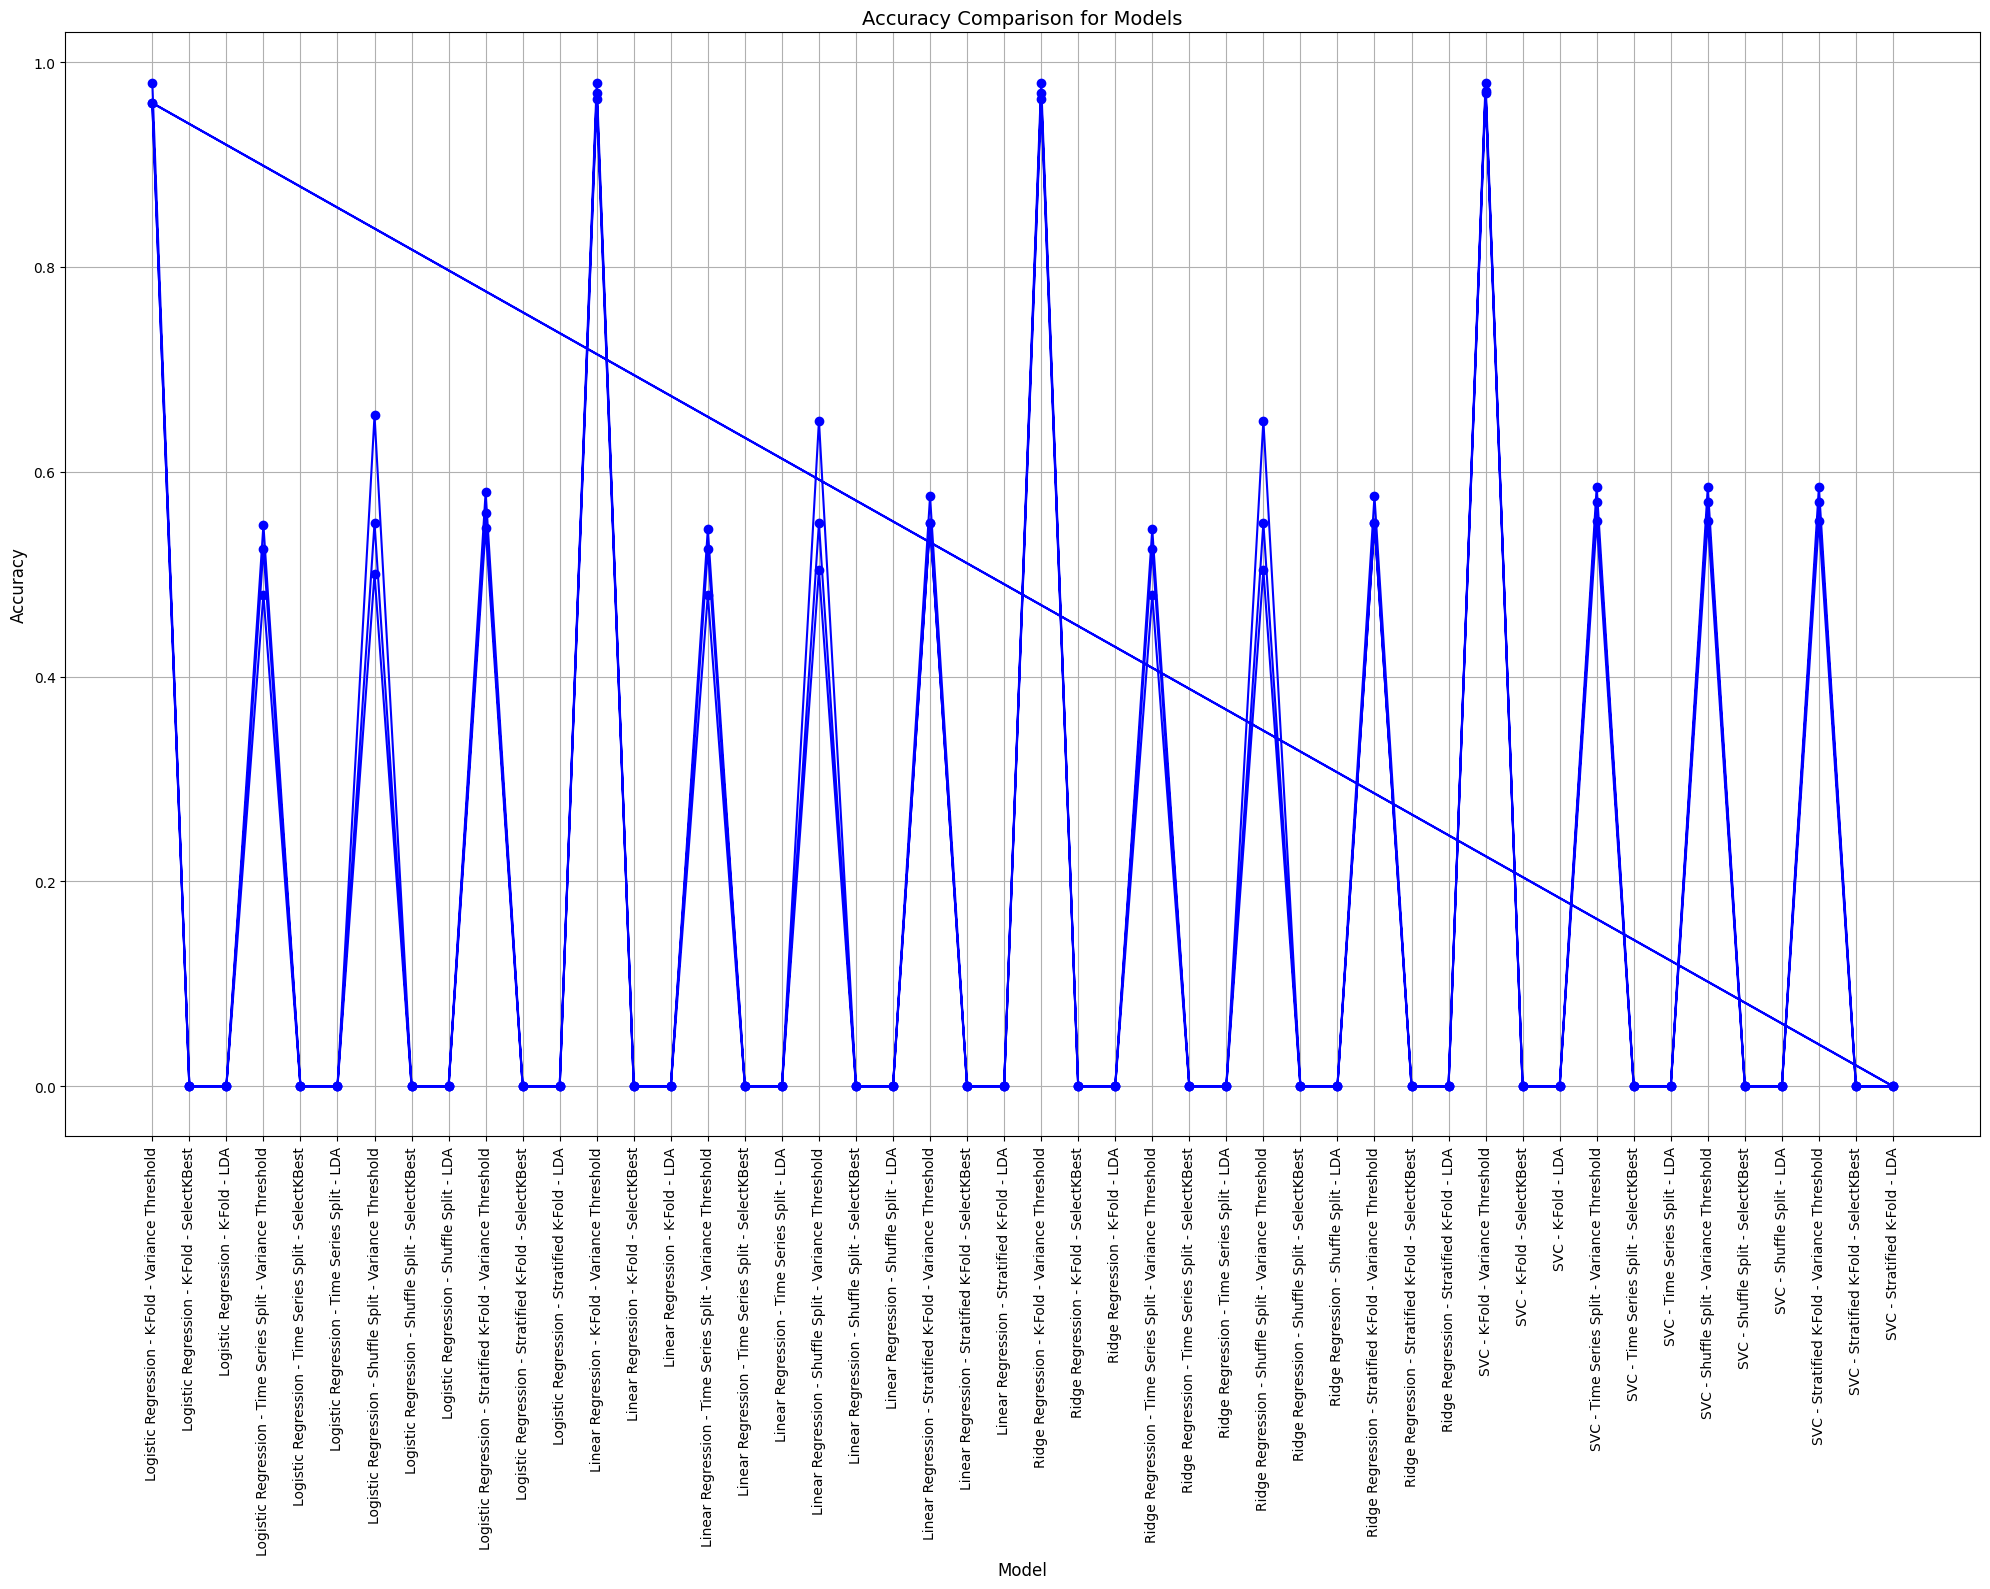

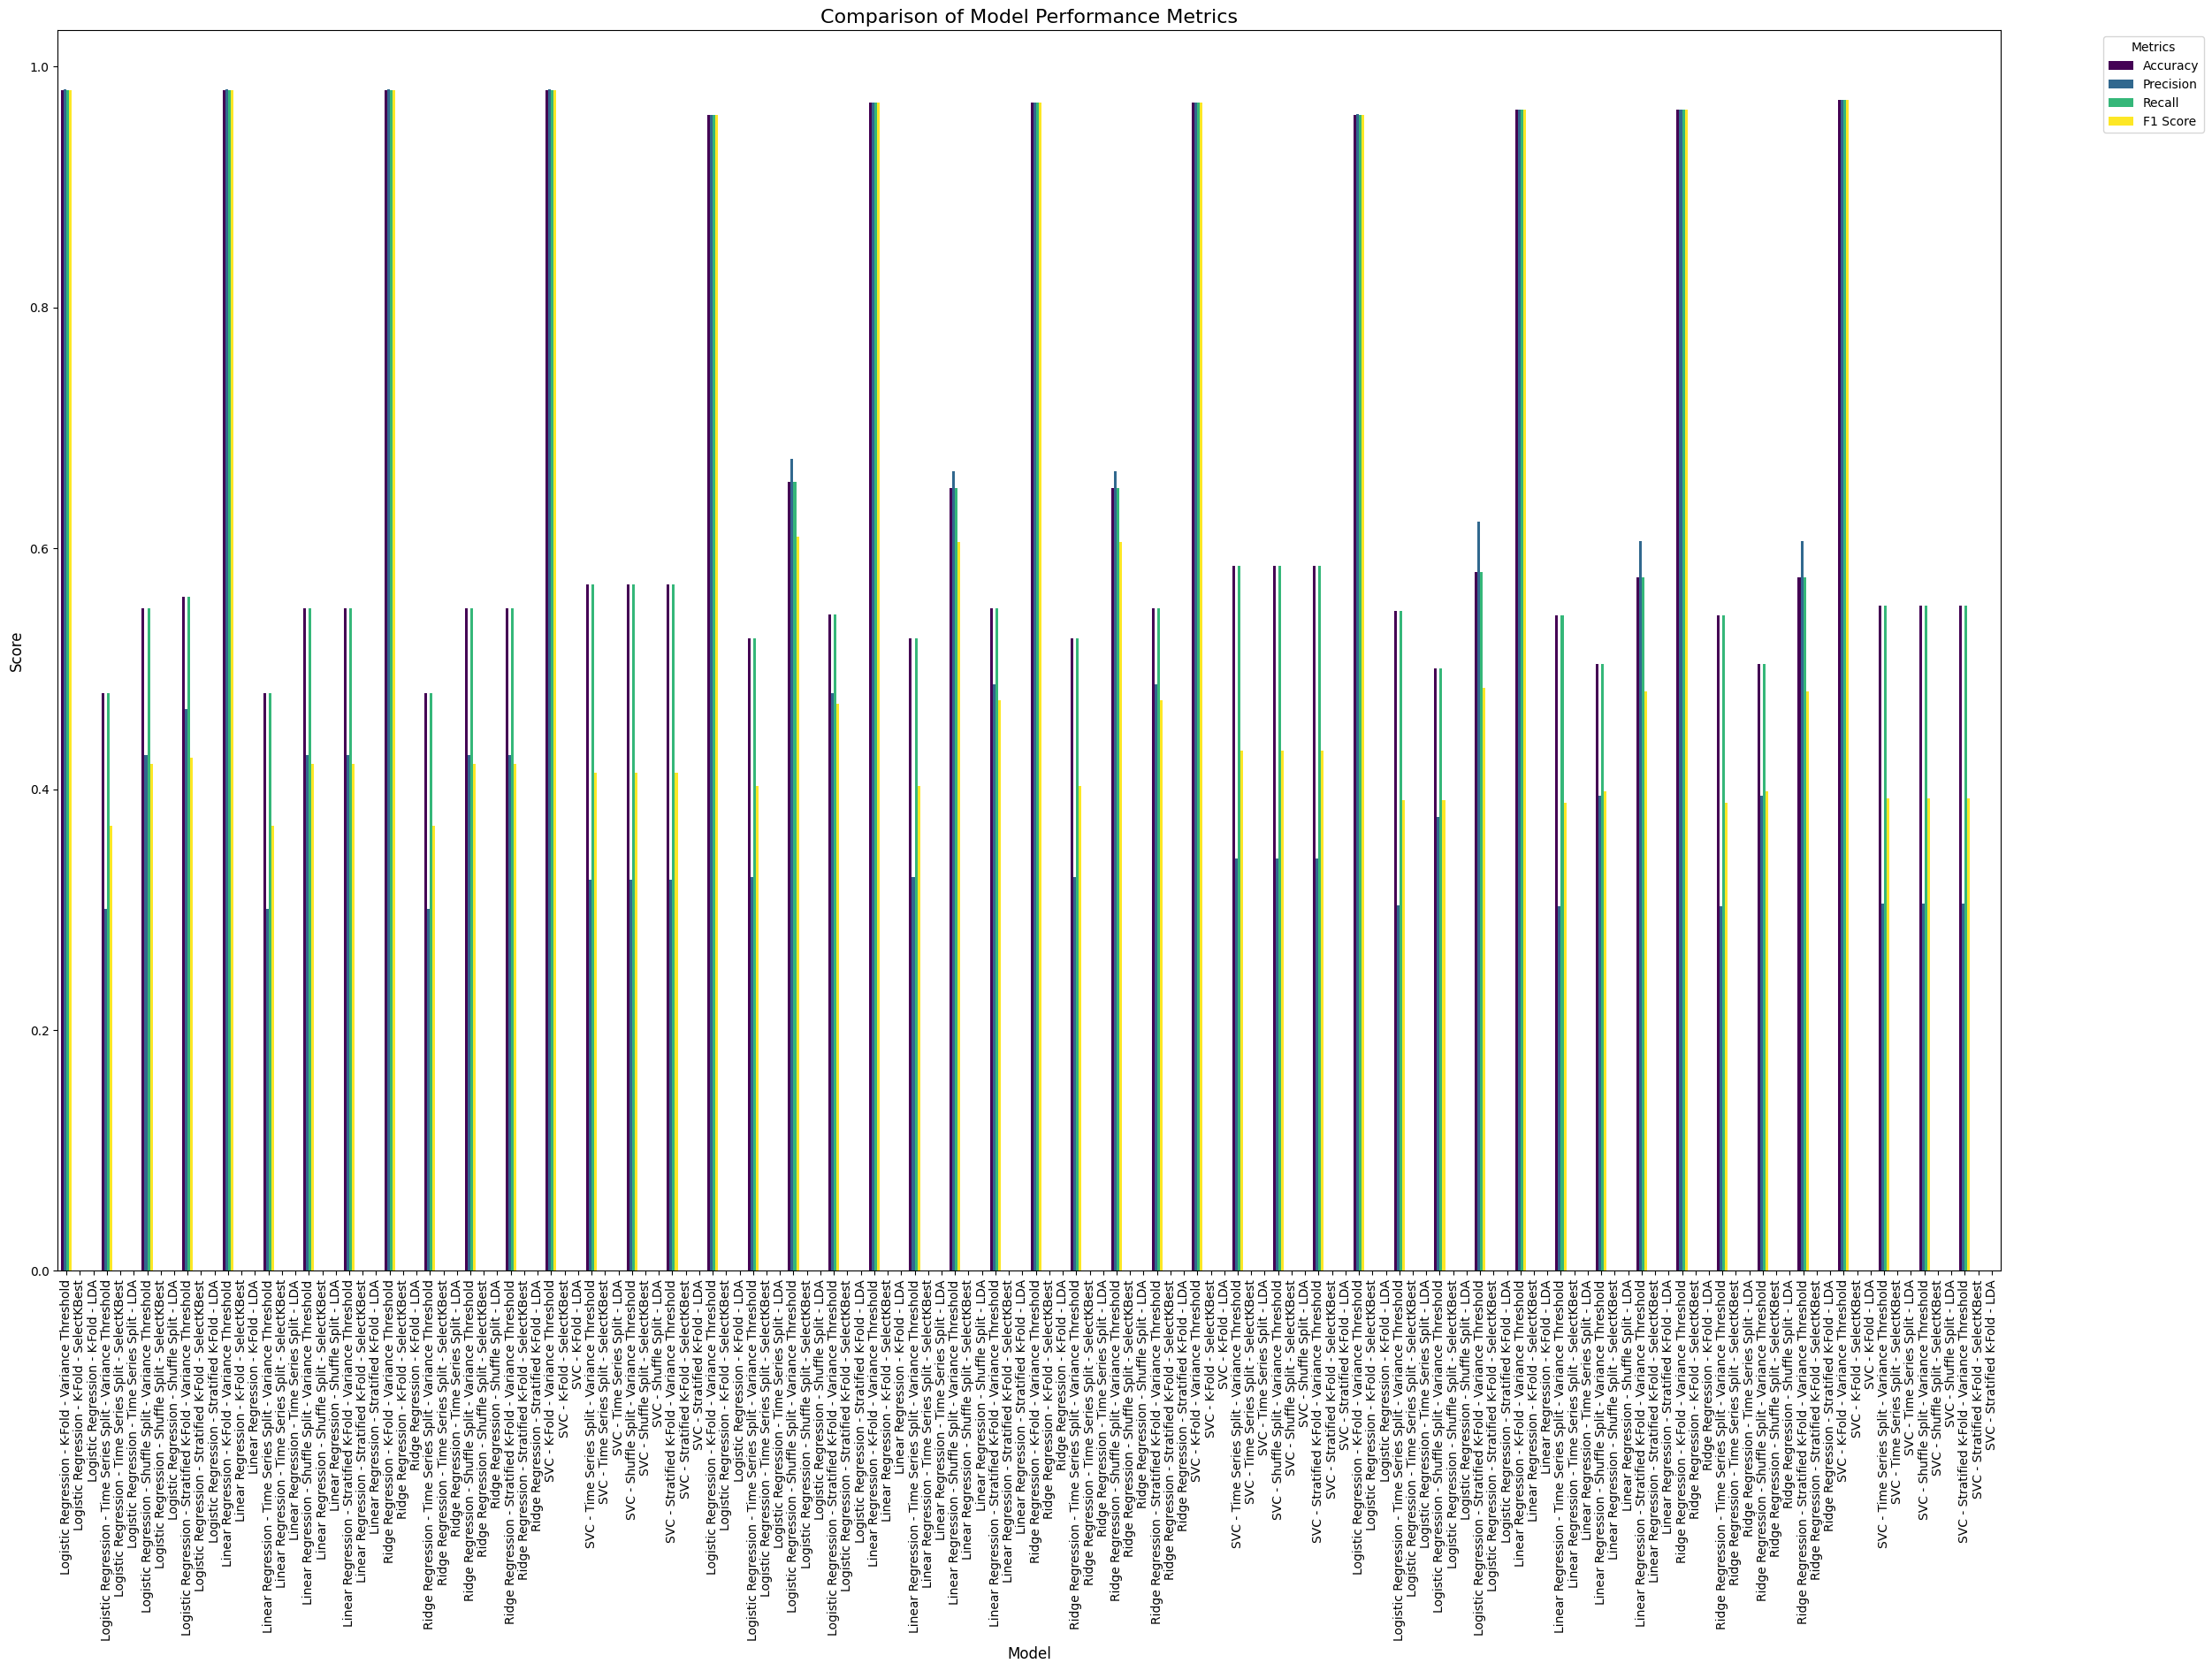

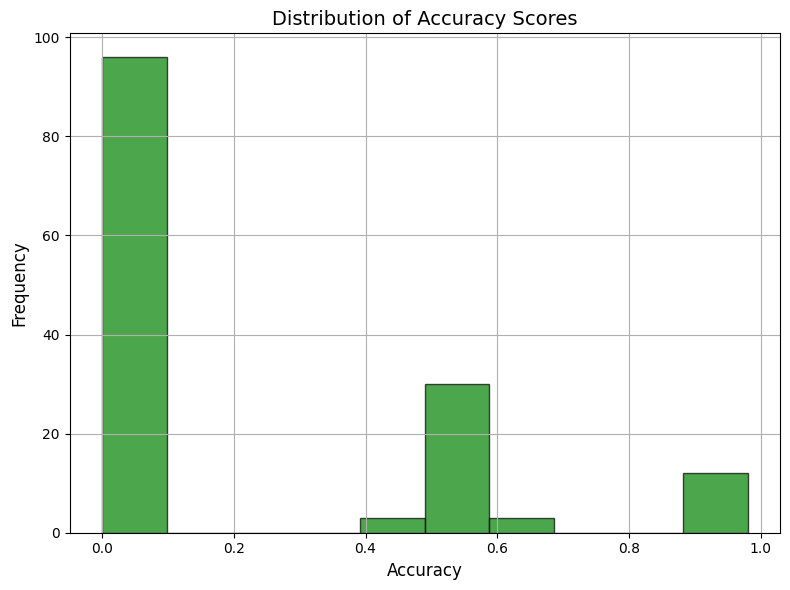

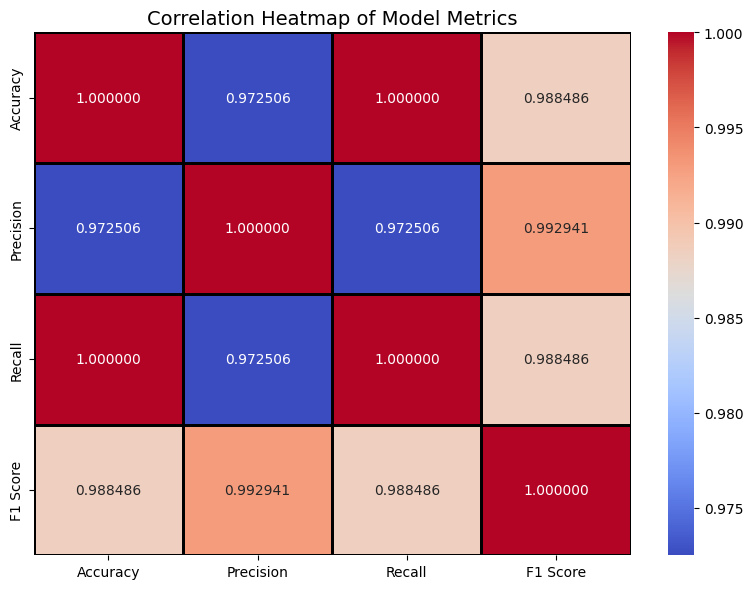

Split ratios: ['90:10', '80:20', '75:25']
Accuracy by split ratio: [0.98, 0.0, 0.0]


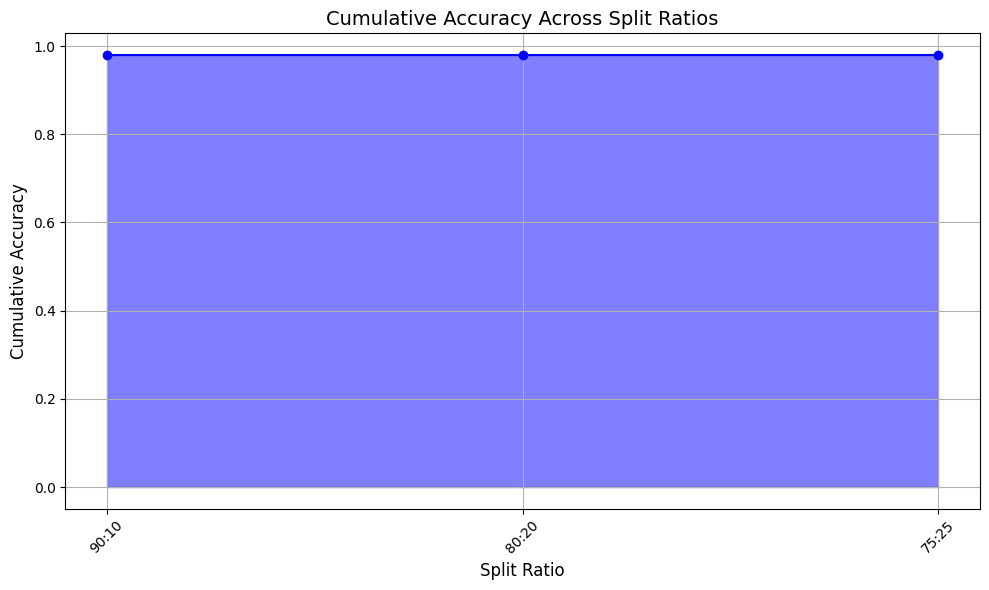

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Define constants for text formatting
BOLD = '\033[1m'
UNDERLINE = '\033[4m'
YELLOW = '\033[93m'
BLUE = '\033[94m'
GREEN = '\033[92m'
RED = '\033[91m'
RESET = '\033[0m'

def compare_models(X, y, split_ratios, cv_methods, algorithms, feature_selection_methods):
    # Initialize storage for best models
    best_models = {ratio: {'model': None, 'accuracy': 0} for ratio in split_ratios}
    overall_best_model = {
    'model': None,
    'accuracy': float('-inf'),  # Initialize to negative infinity
    'split_ratio': None
    }

    all_results = {ratio: run_cross_validation(X, y, ratio, cv_methods, algorithms, feature_selection_methods) for ratio in split_ratios}

    print(f"\n{BOLD}{UNDERLINE}{YELLOW}BEST MODEL PER SPLIT RATIO:{RESET}\n")

    # Placeholder for visualization data
    accuracy_results = []
    precision_results = []
    recall_results = []
    f1_results = []
    models_for_split = []

    for split_ratio, results in all_results.items():
        print(f"{BOLD}{BLUE}Split Ratio {int(split_ratio[0]*100)}:{int(split_ratio[1]*100)}{RESET}")

        for algo_name, metrics in results.items():
            for cv_name in metrics:
                for fs_method in metrics[cv_name]:
                    # Safely retrieve values with a default of [0]
                    accuracy_list = metrics[cv_name][fs_method].get('accuracy', [0])
                    precision_list = metrics[cv_name][fs_method].get('precision', [0])
                    recall_list = metrics[cv_name][fs_method].get('recall', [0])
                    f1_list = metrics[cv_name][fs_method].get('f1', [0])

                    # Use max() only if the list is not empty
                    best_accuracy = max(accuracy_list) if accuracy_list else 0
                    best_precision = max(precision_list) if precision_list else 0
                    best_recall = max(recall_list) if recall_list else 0
                    best_f1 = max(f1_list) if f1_list else 0

                    print(f"      {algo_name} - CV: {cv_name}, Feature Selection: {fs_method} - "
                        f"Best Accuracy: {best_accuracy:.6f}, Precision: {best_precision:.6f}, "
                        f"Recall: {best_recall:.6f}, F1 Score: {best_f1:.6f}")

                    accuracy_results.append(best_accuracy)
                    precision_results.append(best_precision)
                    recall_results.append(best_recall)
                    f1_results.append(best_f1)
                    models_for_split.append(f"{algo_name} - {cv_name} - {fs_method}")

                    # Update the best model for this split ratio
                    if best_accuracy > best_models[split_ratio]['accuracy']:
                        best_models[split_ratio] = {
                            'model': f"{algo_name} - CV: {cv_name}, FS: {fs_method}",
                            'accuracy': best_accuracy
                        }

        best_model = best_models[split_ratio]
        print(f"{GREEN}{BOLD}Best Model for Split Ratio {int(split_ratio[0]*100)}:{int(split_ratio[1]*100)} - {best_model['model']} with Accuracy: {best_model['accuracy']:.6f}{RESET}\n")

        # Update the overall best model
        if best_model['accuracy'] > overall_best_model['accuracy']:
           overall_best_model = {
               'model': best_model['model'],
               'accuracy': best_model['accuracy'],
               'split_ratio': split_ratio
           }

    # Print the overall best model
    overall_best = overall_best_model
    print(f"{RED}{BOLD}{UNDERLINE}OVERALL BEST MODEL:{RESET}")
    print(f"{BOLD}{overall_best['model']} with Accuracy: {overall_best['accuracy']:.6f} at Split Ratio {int(overall_best['split_ratio'][0]*100)}:{int(overall_best['split_ratio'][1]*100)}{RESET}\n")

    # Visualization

    # 1. Line Chart: Compare accuracy across models for each split ratio
    plt.figure(figsize=(20, 16))
    plt.plot(models_for_split, accuracy_results, marker='o', label='Accuracy', color='b')
    plt.xticks(rotation=90)
    plt.title('Accuracy Comparison for Models', fontsize=14)
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 2. Bar Chart: Compare performance metrics (accuracy, precision, recall, f1 score)
    metrics_df = pd.DataFrame({
        'Model': models_for_split,
        'Accuracy': accuracy_results,
        'Precision': precision_results,
        'Recall': recall_results,
        'F1 Score': f1_results
    })

    # Set the 'Model' column as the index
    metrics_df.set_index('Model', inplace=True)

    # Plotting the grouped bar chart
    ax = metrics_df.plot(kind='bar', figsize=(25, 19), width=0.8, colormap='viridis')

    # Add title and labels
    plt.title('Comparison of Model Performance Metrics', fontsize=16)
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Score', fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)

    # Add legend with the title 'Metrics' and position it outside the plot for clarity
    plt.legend(title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Adjust the layout to make room for the legend and improve presentation
    plt.tight_layout()

    # Display the plot
    plt.show()


    # 3. Histogram: Distribution of Accuracy Scores
    plt.figure(figsize=(8, 6))
    plt.hist(accuracy_results, bins=10, color='g', edgecolor='black', alpha=0.7)
    plt.title('Distribution of Accuracy Scores', fontsize=14)
    plt.xlabel('Accuracy', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 4. Heatmap: Correlation between different metrics (accuracy, precision, recall, F1)
    metrics_corr = metrics_df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(metrics_corr, annot=True, cmap='coolwarm', fmt='.6f', linewidths=1, linecolor='black')
    plt.title('Correlation Heatmap of Model Metrics', fontsize=14)
    plt.tight_layout()
    plt.show()

    # 5. Area Chart: Cumulative performance across split ratios
    # Calculate mean accuracy per split ratio
    split_ratios_str = [f"{int(r[0]*100)}:{int(r[1]*100)}" for r in split_ratios]

    # Initialize an empty list to store the accuracy values for each split ratio
    accuracy_by_split_ratio = []

    # Loop through each split ratio and calculate the mean accuracy for each split
    for split_ratio in split_ratios:
        # Collect accuracy values for the current split ratio
        split_accuracy = [accuracy_results[i] for i, ratio in enumerate(split_ratios) if ratio == split_ratio]
        # Store the mean accuracy for this split ratio
        accuracy_by_split_ratio.append(np.mean(split_accuracy))

    # Check if the lengths match
    print(f"Split ratios: {split_ratios_str}")
    print(f"Accuracy by split ratio: {accuracy_by_split_ratio}")

    # Calculate cumulative accuracy
    cumulative_accuracy = np.cumsum(accuracy_by_split_ratio)

    # Plot the area chart
    plt.figure(figsize=(10, 6))
    plt.fill_between(split_ratios_str, 0, cumulative_accuracy, color='b', alpha=0.5)
    plt.plot(split_ratios_str, cumulative_accuracy, marker='o', color='b', label='Cumulative Accuracy')
    plt.title('Cumulative Accuracy Across Split Ratios', fontsize=14)
    plt.xlabel('Split Ratio', fontsize=12)
    plt.ylabel('Cumulative Accuracy', fontsize=12)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function with the required parameters
compare_models(X, y, split_ratios, cv_methods, algorithms, feature_selection_methods)
